1. 边缘检测模板设计
* 读取图像
* 设计合理的卷积核，分别提取水平边缘和垂直边缘，并可视化出来
* 合并水平边缘和垂直边缘，并可视化出来

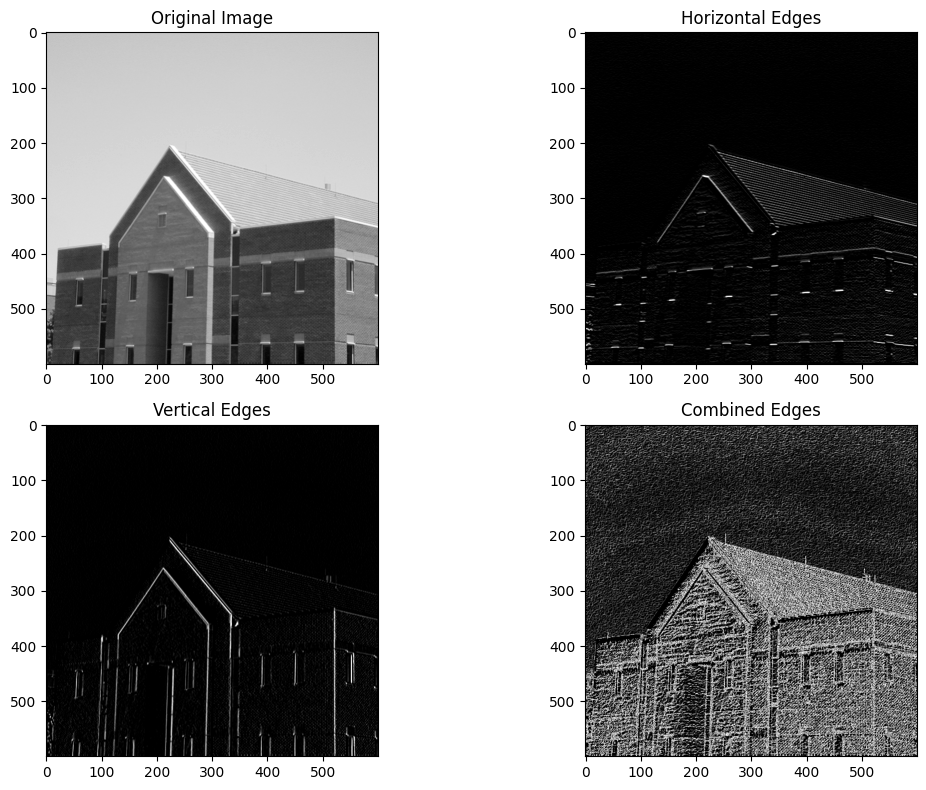

In [1]:
# 代码写在这里
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('F://My-study//machine vision//data//fig_house.png', cv2.IMREAD_GRAYSCALE)

# 设计卷积核
kernel_horizontal = np.array([[-1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]])

kernel_vertical = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])

# 提取水平边缘
horizontal_edges = cv2.filter2D(image, -1, kernel_horizontal)

# 提取垂直边缘
vertical_edges = cv2.filter2D(image, -1, kernel_vertical)

# 合并边缘
combined_edges = np.sqrt(horizontal_edges**2 + vertical_edges**2)
combined_edges = np.uint8(combined_edges)

# 可视化
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')

plt.subplot(2, 2, 3)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')

plt.subplot(2, 2, 4)
plt.imshow(combined_edges, cmap='gray')
plt.title('Combined Edges')

plt.tight_layout()
plt.show()


2. Canny边缘检测算法设计
* 读取图像
* 对图像平滑去噪处理
* Sobel边缘提取
* 非极大值抑制
* 双阈值处理
* 滞后边界跟踪
* 以上各步均要可视化结果

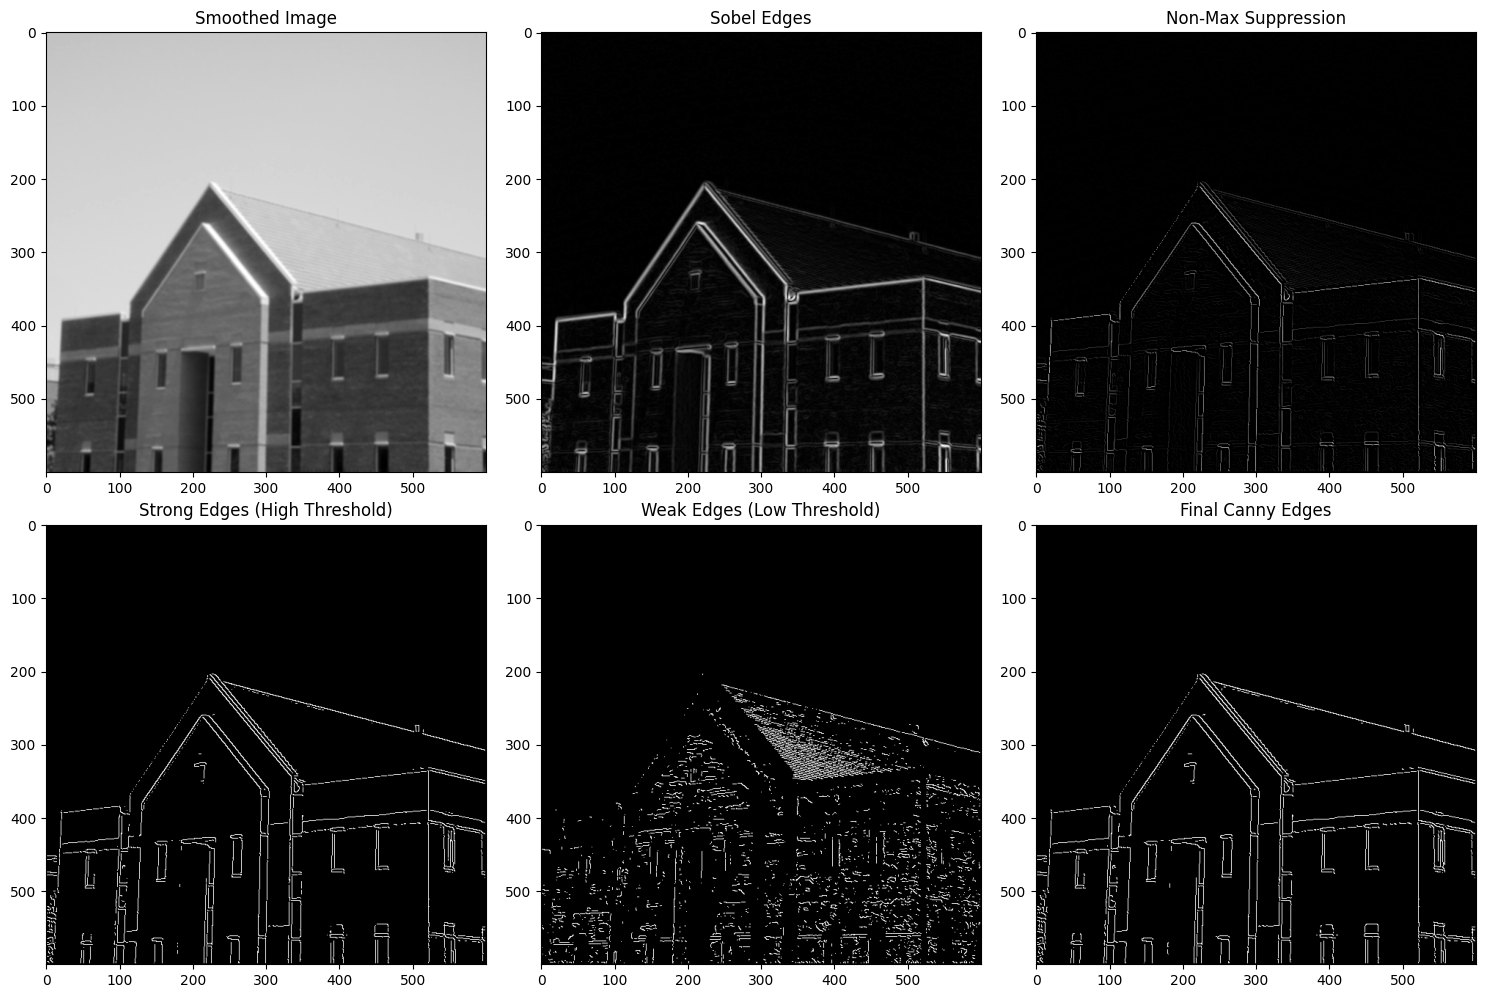

In [2]:
# 代码写在这里
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('F:/My-study/machine vision/data/fig_house.png', cv2.IMREAD_GRAYSCALE)

# 1. 图像平滑去噪
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# 2. Sobel边缘提取
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x) * 180 / np.pi

# 3. 非极大值抑制
def non_max_suppression(mag, angle):
    height, width = mag.shape
    suppressed = np.zeros_like(mag)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            direction = angle[i, j]
            # 角度量化到0,45,90,135度
            if (0 <= direction < 22.5) or (157.5 <= direction <= 180):
                neighbor1 = mag[i, j+1]
                neighbor2 = mag[i, j-1]
            elif 22.5 <= direction < 67.5:
                neighbor1 = mag[i+1, j+1]
                neighbor2 = mag[i-1, j-1]
            elif 67.5 <= direction < 112.5:
                neighbor1 = mag[i+1, j]
                neighbor2 = mag[i-1, j]
            else:
                neighbor1 = mag[i+1, j-1]
                neighbor2 = mag[i-1, j+1]
                
            if mag[i, j] >= neighbor1 and mag[i, j] >= neighbor2:
                suppressed[i, j] = mag[i, j]
    return suppressed

suppressed = non_max_suppression(gradient_magnitude, gradient_direction)

# 4. 双阈值处理
high_threshold = 0.15 * np.max(suppressed)
low_threshold = 0.05 * np.max(suppressed)

strong_edges = (suppressed >= high_threshold)
weak_edges = (suppressed >= low_threshold) & (suppressed < high_threshold)

# 5. 滞后边界跟踪
def hysteresis(strong, weak):
    height, width = strong.shape
    result = np.zeros_like(strong)
    
    strong_pixels = np.argwhere(strong)
    for i, j in strong_pixels:
        result[i, j] = 255
        
    weak_pixels = np.argwhere(weak)
    for i, j in weak_pixels:
        if np.any(strong[i-1:i+2, j-1:j+2]):
            result[i, j] = 255
    return result

final_edges = hysteresis(strong_edges, weak_edges)

# 可视化
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(2, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edges')

plt.subplot(2, 3, 3)
plt.imshow(suppressed, cmap='gray')
plt.title('Non-Max Suppression')

plt.subplot(2, 3, 4)
plt.imshow(strong_edges, cmap='gray')
plt.title('Strong Edges (High Threshold)')

plt.subplot(2, 3, 5)
plt.imshow(weak_edges, cmap='gray')
plt.title('Weak Edges (Low Threshold)')

plt.subplot(2, 3, 6)
plt.imshow(final_edges, cmap='gray')
plt.title('Final Canny Edges')

plt.tight_layout()
plt.show()
